In [3]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *

In [4]:
np.random.seed(1)
random.seed(1)

t = 1000
n_list = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200]
ensCIT = [(kcit, 1, p_alpha2)]

results = {}

for cit, k, p_ensemble in ensCIT:

    eI_list = []
    power_list = []
    tim_list = []

    for n in n_list:
        if cit != kcit or k!=1 or n<6000:
            start_time = time.time()
            eI = 0
            eII = 0
            for i in tqdm(range(t), desc=f"{cit.__name__:>7},{k:>3},{p_ensemble.__name__:>11}, n={n:>5}"):
                dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian', noise_dis='t3',noise_std=1)))
                dataII = np.hstack((generate_samples(n=n,indp='N',z_dis='gaussian', noise_dis='t3',noise_std=1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], [2])
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI += 1
                if pII>0.05:
                    eII += 1
            eI = eI/t
            eII = eII/t
            power = 1-eII
            end_time = time.time()

            eI_list.append(eI)
            power_list.append(power)
            tim_list.append(end_time - start_time)

    
    results[cit.__name__ + str(k) + p_ensemble.__name__] = [eI_list, power_list, tim_list]

results

   kcit,  1,   p_alpha2, n= 3200: 100%|██████████| 1000/1000 [6:33:09<00:00, 23.59s/it] 


{'kcit1p_alpha2': [[0.033,
   0.035,
   0.04,
   0.041,
   0.039,
   0.043,
   0.042,
   0.039,
   0.045,
   0.052,
   0.039,
   0.036,
   0.059,
   0.043,
   0.046,
   0.045],
  [0.598,
   0.758,
   0.796,
   0.7969999999999999,
   0.812,
   0.844,
   0.848,
   0.855,
   0.845,
   0.871,
   0.853,
   0.863,
   0.867,
   0.875,
   0.864,
   0.863],
  [51.3425509929657,
   133.46113109588623,
   312.6476891040802,
   627.1693391799927,
   989.6646888256073,
   1588.332377910614,
   2350.788138151169,
   3379.3411548137665,
   4616.17840886116,
   6263.575420856476,
   8082.608168840408,
   10451.161754846573,
   12918.126124858856,
   15887.210462331772,
   19360.067582130432,
   23589.31099796295]]}

In [1]:
n_list = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200]
results = {'kcit1p_alpha2': [[0.033,
   0.035,
   0.04,
   0.041,
   0.039,
   0.043,
   0.042,
   0.039,
   0.045,
   0.052,
   0.039,
   0.036,
   0.059,
   0.043,
   0.046,
   0.045],
  [0.598,
   0.758,
   0.796,
   0.7969999999999999,
   0.812,
   0.844,
   0.848,
   0.855,
   0.845,
   0.871,
   0.853,
   0.863,
   0.867,
   0.875,
   0.864,
   0.863],
  [51.3425509929657,
   133.46113109588623,
   312.6476891040802,
   627.1693391799927,
   989.6646888256073,
   1588.332377910614,
   2350.788138151169,
   3379.3411548137665,
   4616.17840886116,
   6263.575420856476,
   8082.608168840408,
   10451.161754846573,
   12918.126124858856,
   15887.210462331772,
   19360.067582130432,
   23589.31099796295]]}

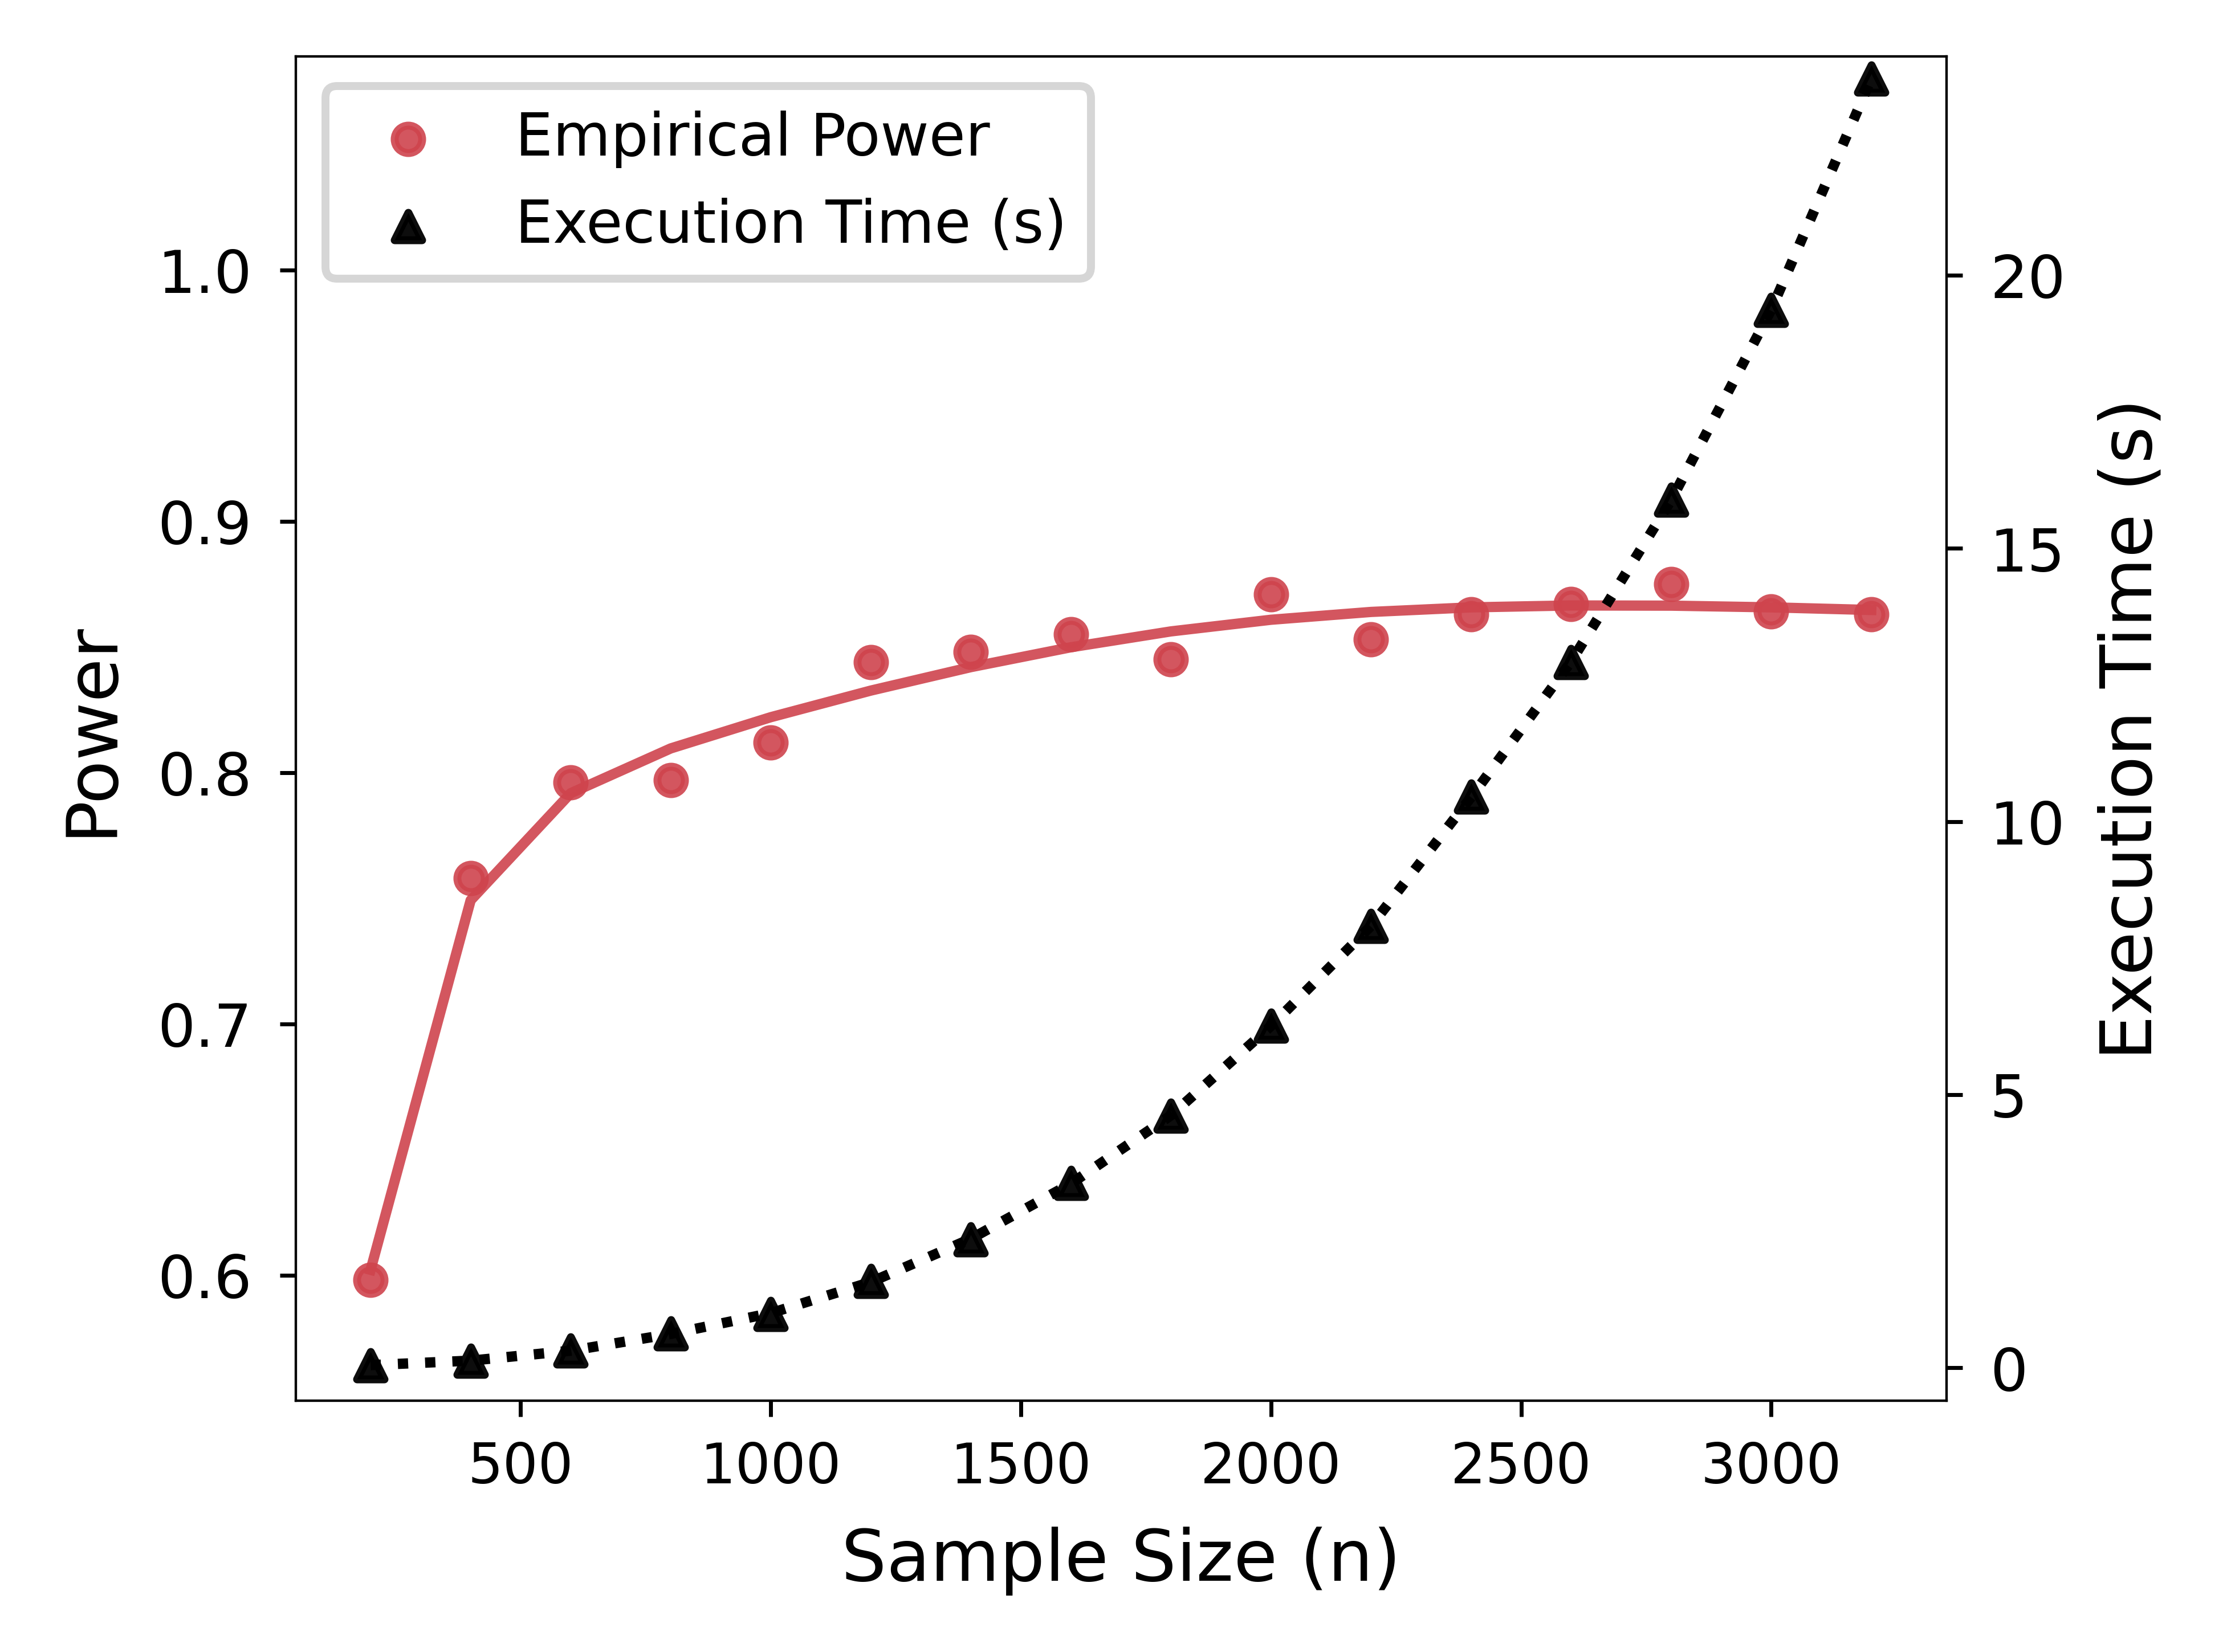

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 只保留一个 result
fig, ax1 = plt.subplots(figsize=(4, 3), dpi=1000)
ax2 = ax1.twinx()  # 创建副 y 轴

linestyles = ['-', ':']
markers = ['o', '^']
colors = ["#cf444d", "black"]
labels = ["Empirical Power", "Execution Time (s)"]

result = list(results.values())[0]
eI, power, tim = result
eSum = np.array(eI) + 1 - np.array(power)
tim = np.array(tim) / 1000  # 转换为秒

x_vals = n_list[:len(eI)] if len(eI) != len(n_list) else n_list


ax1.scatter(x_vals, power, marker=markers[0], color=colors[0], label=labels[0], s=12, alpha=0.9)

ax2.scatter(x_vals, tim, marker=markers[1], color=colors[1], label=labels[1], s=12, alpha=0.95)


from scipy.interpolate import UnivariateSpline
spline_power = UnivariateSpline(x_vals, power, s=0.001)
spline_tim = UnivariateSpline(x_vals, tim, s=0.001)

ax1.plot(x_vals, spline_power(x_vals), linestyle=linestyles[0], color=colors[0], linewidth=1.3, alpha=0.9)

ax2.plot(x_vals, spline_tim(x_vals), linestyle=linestyles[1], color=colors[1], linewidth=1.3)

ax1.set_xlabel("Sample Size (n)", fontsize=9)
ax1.set_ylabel("Power", fontsize=9)
ax2.set_ylabel("Execution Time (s)", fontsize=9)

#ax1.set_xticks(n_list)
#ax1.set_xticklabels(n_list, rotation=45)
ax1.set_ylim(0.55, 1.085)
ax2.set_ylim(-0.6, 24)

for ax in [ax1, ax2]:
    ax.tick_params(axis='x', which='major', pad=3)
    ax.tick_params(axis='both', which='both', width=0.5, length=2, labelsize=7.5)
    ax.tick_params(axis='x', which='both', labelsize=7)
    for spine in ax.spines.values():
        spine.set_linewidth(0.3)

# 图例合并主轴和副轴
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=7.5)


plt.tight_layout()
#plt.savefig("intro.pdf", format='pdf')
plt.show()